In [24]:
import glob
import pickle
import random

from math import radians

from keyrover import *
from keyrover.ml import get_device
from keyrover.math.bilinear import InverseBilinear

In [16]:
device = get_device()

files = glob.glob(f"{SEGMENTATION_DATASET}-nofisheye/*")
with open("datasets/camera/camera_data.bin", "rb") as f:
    camera_data = pickle.load(f)

In [17]:
transform = InverseBilinear(1, width=640, height=480, device=device,
                            p1=KeyboardBottomLeft, p2=KeyboardBottomRight, p3=KeyboardTopRight, p4=KeyboardTopLeft)

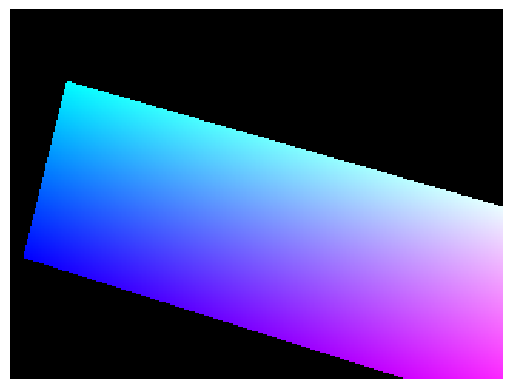

In [26]:
mask = transform(alpha=radians(3), beta=radians(5), gamma=radians(15), position=[0, 0, 4])

print()
imshow(mask[0])

datasets/segmentation/v4-nofisheye/keyboard_1730_1.jpg


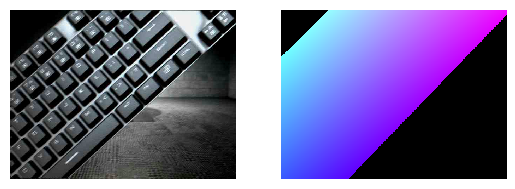

In [23]:
path = random.choice(files)
img = cv2.imread(path)
print(path)

i = int(path.split("_")[1]) - 1

mask = transform(*camera_data["rotation"][i], camera_data["location"][i])
imshow(img, mask[0])